In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
HTML("""<style>.output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>""")

import pandas as pd

import pyarrow
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig
import datetime

import plotly.express as px
import kaleido

import glob
from pathlib import Path

In [2]:
# !git repo clone "https://github.com/SamuelAmrich/Aspis_sam.git"
import Aspis_BinLib as BinLib

In [3]:
binlib = BinLib.BinLib()

In [4]:
lat_bin, lon_bin = np.loadtxt("Bins_equidistant.txt", delimiter='\t', usecols=(0, 1), unpack=True)
bins = []
for (temp_lat, temp_lon) in zip(lat_bin, lon_bin):
    bins.append([temp_lat, temp_lon, 0])
    
bins = np.array(bins)

In [5]:
labels = ['WN', 'TOW', 'PRN(GSV)', 'RxState', 'Azimuth', 'Elevation',
       'AvgSig1_C/N0', 'S4_Sig1', 'Cor_S4_Sig1', 'Phi01_Sig1', 'Phi03_Sig1',
       'Phi10_Sig1', 'Phi30_Sig1', 'Phi60_Sig1', 'AvgCCD_Sig1',
       'SigmaCCD_Sig1', 'TEC_TOW-45s', 'dTEC_TOW-60_to_TOW-45', 'TEC_TOW-30s',
       'dTEC_TOW-45_to_TOW-30', 'TEC_TOW-15s', 'dTEC_TOW-30_to_TOW-15',
       'TEC_TOW', 'dTEC_TOW-15_to_TOW', 'Sig1_lock_time', 'channel_status',
       'Lock_time_2nd_freq', 'Avg_C/N0_2nd_freq', 'S4_Sig2', 'Phi30_Sig2',
       'Phi60_Sig2', 'SigmaCCD_Sig2', 'Cor_S4_Sig2', 'AvgCCD_Sig2',
       'Sig5_lock_time', 'AvgSig5_C/N0', 'S4_Sig5', 'Phi30_Sig5', 'Phi60_Sig5',
       'End_Integration_time_interval(UTC)', 'PRN(Rinex)', 'S4_Sig1_pcode',
       'Phi30_Sig1_pcode', 'Phi60_Sig1_pcode', 'S4_Sig2_pcode',
       'Phi30_Sig2_pcode', 'Phi60_Sig2_pcode', 'n_of_input_S4_Sig1',
       'n_of_input_Phi60_Sig1', 'n_of_input_S4_Sig1_pcode',
       'n_of_input_Phi60_Sig1_pcode', 'n_of_input_S4_Sig2',
       'n_of_input_Phi60_Sig2', 'n_of_input_S4_Sig2_pcode',
       'n_of_input_Phi60_Sig2_pcode', 'n_of_input_S4_Sig5',
       'n_of_input_Phi60_Sig5', 'Avg_space_vehicle_x', 'Avg_space_vehicle_y',
       'Avg_space_vehicle_z', 'Station', 'Latitude', 'Longitude', "ERROR", "CHYBA"]

In [6]:
station_name = "Toulouse_50Hz"
data_all = pd.DataFrame(columns = labels).iloc[: , :11]
data_all = data_all.astype({'Phi01_Sig1': 'int64'}).dtypes

sigma_phi = np.array([])
amount = 0
i=0 
parquet_file="2016/Toulouse_50Hz/msto01_N_DELTA_00437_160903.sct" 
print("Day: ", i,";\t File: ", parquet_file, ";\t Status: ", "Succes")
with open(parquet_file) as file:
    lines = file.readlines()
    temp_arr = np.array([lines[i].split(",") for i in range(len(lines))])

    temp_df1 = pd.DataFrame(temp_arr, columns = labels)
    temp_df1 = temp_df1.set_index('Phi60_Sig1_pcode')
    temp_df1.index = pd.to_datetime(temp_df1.index)
    temp_df1["time"] = temp_df1.index

    temp_sigma_phi = np.array(temp_df1['Phi01_Sig1']).astype('float64')
    sigma_phi = np.concatenate((sigma_phi, temp_sigma_phi))
    
temp_df1
temp_df1['Latitude'] = 43.5*np.ones(len(temp_df1['Latitude']))
temp_df1['Longitude'] = 1.5*np.ones(len(temp_df1['Longitude']))

Day:  0 ;	 File:  2016/Toulouse_50Hz/msto01_N_DELTA_00437_160903.sct ;	 Status:  Succes


In [7]:
station_name = "Neustrelitz_50Hz"
data_all = pd.DataFrame(columns = labels).iloc[: , :11]
data_all = data_all.astype({'Phi01_Sig1': 'int64'}).dtypes

sigma_phi = np.array([])
amount = 0
i=0 
parquet_file="2016/Neustrelitz_50Hz/msnz02_N_DELTA_01531_160903.sct" 
print("Day: ", i,";\t File: ", parquet_file, ";\t Status: ", "Succes")
with open(parquet_file) as file:
    lines = file.readlines()
    temp_arr = np.array([lines[i].split(",") for i in range(len(lines))])

    temp_df2 = pd.DataFrame(temp_arr, columns = labels)
    temp_df2 = temp_df2.set_index('Phi60_Sig1_pcode')
    temp_df2.index = pd.to_datetime(temp_df2.index)
    temp_df2["time"] = temp_df2.index

    temp_sigma_phi = np.array(temp_df2['Phi01_Sig1']).astype('float64')
    sigma_phi = np.concatenate((sigma_phi, temp_sigma_phi))
    
temp_df2['Latitude'] = 53.5*np.ones(len(temp_df2['Latitude']))
temp_df2['Longitude'] = 13*np.ones(len(temp_df2['Longitude']))

Day:  0 ;	 File:  2016/Neustrelitz_50Hz/msnz02_N_DELTA_01531_160903.sct ;	 Status:  Succes


In [8]:
# kandi> 160806, 160807, 160820, best 160901, 160902

In [9]:
frames = [temp_df1, temp_df2]
  
data_all = pd.concat(frames)

In [10]:
data_all = data_all.astype({'Elevation': 'float64', 'Azimuth': 'float64', 'Phi01_Sig1': 'float64', 'S4_Sig1': 'float64', 'Latitude': 'float64', 'Longitude': 'float64'})

In [11]:
data_all = data_all[data_all["Elevation"]>=20]
data_all = data_all.dropna(subset=['Azimuth', 'Elevation', "S4_Sig1"])
data_all = data_all[data_all["S4_Sig1"]>0]
data_all = data_all[data_all["Phi01_Sig1"]>0]
data_all = data_all.sort_index()
data_all.index = pd.to_datetime(data_all.index)
data_all["time"] = data_all.index
data_all

WN     TOW PRN(GSV) RxState   Azimuth  Elevation  \
Phi60_Sig1_pcode                                                          
2016-09-03 00:01:00  1912  518460      219    -999  -55.2425    62.4813   
2016-09-03 00:01:00  1912  518460        5    -999 -142.7090    45.4801   
2016-09-03 00:01:00  1912  518460        7    -999   68.6237    27.8727   
2016-09-03 00:01:00  1912  518460       13    -999  -69.8387    61.7798   
2016-09-03 00:01:00  1912  518460       15    -999  -65.6606    29.1121   
...                   ...     ...      ...     ...       ...        ...   
2016-09-04 00:00:00  1913       0       71    -999  139.7550    52.9120   
2016-09-04 00:00:00  1913       0       72    -999  -33.3237    69.6493   
2016-09-04 00:00:00  1913       0       74    -999 -130.0120    72.5771   
2016-09-04 00:00:00  1913       0      208    -999 -172.3060    84.9813   
2016-09-04 00:00:00  1913       0       74    -999 -128.8390    56.8750   

                    AvgSig1_C/N0   S4_Sig1 Cor_S4_Sig1  Phi01_Sig1  ...  \
Phi60_Sig1_pcode                                                    ...   
2016-09-03 00:01:00       50.943  0.038102     -999.99    0.024241  ...   
2016-09-03 00:01:00      50.4642  0.052449     -999.99    0.029224  ...   
2016-09-03 00:01:00      47.5815  0.090110     -999.99    0.026039  ...   
2016-09-03 00:01:00      52.5471  0.037054     -999.99    0.019404  ...   
2016-09-03 00:01:00      48.2047  0.057369     -999.99    0.030066  ...   
...                          ...       ...         ...         ...  ...   
2016-09-04 00:00:00      55.4925  0.025123     -999.99    0.019106  ...   
2016-09-04 00:00:00      54.8654  0.025933     -999.99    0.014686  ...   
2016-09-04 00:00:00      56.2087  0.036055     -999.99    0.013741  ...   
2016-09-04 00:00:00      54.9176  0.022947     -999.99    0.015961  ...   
2016-09-04 00:00:00      55.3387  0.040853     -999.99    0.018399  ...   

                    n_of_input_Phi60_Sig5 Avg_space_vehicle_x  \
Phi60_Sig1_pcode                                                
2016-09-03 00:01:00                  -999                -999   
2016-09-03 00:01:00                  3000                3000   
2016-09-03 00:01:00                  3000                3000   
2016-09-03 00:01:00                  -999                3000   
2016-09-03 00:01:00                  3000                3000   
...                                   ...                 ...   
2016-09-04 00:00:00                  3000                3000   
2016-09-04 00:00:00                  3000                3000   
2016-09-04 00:00:00                  3000                3000   
2016-09-04 00:00:00                  -999                -999   
2016-09-04 00:00:00                  3000                3000   

                    Avg_space_vehicle_y Avg_space_vehicle_z Station Latitude  \
Phi60_Sig1_pcode                                                               
2016-09-03 00:01:00                -999                3000    3000     43.5   
2016-09-03 00:01:00                3000                -999    -999     53.5   
2016-09-03 00:01:00                3000                -999    -999     53.5   
2016-09-03 00:01:00                3000                -999    -999     53.5   
2016-09-03 00:01:00                3000                -999    -999     53.5   
...                                 ...                 ...     ...      ...   
2016-09-04 00:00:00                3000                -999    -999     43.5   
2016-09-04 00:00:00                3000                -999    -999     43.5   
2016-09-04 00:00:00                3000                -999    -999     43.5   
2016-09-04 00:00:00                -999                3000    3000     43.5   
2016-09-04 00:00:00                3000                -999    -999     53.5   

                    Longitude        ERROR CHYBA                time  
Phi60_Sig1_pcode                                                      
2016-09-03 00:01:00       1.5  2.34742e+07

In [12]:
#data = data_all[data_all.index>"2016-03-12 01:00:00"]
#data = data[data.index<"2016-03-13 00:00:00"]
data = data_all
data = binlib.add_latlon(data, 3)
data = binlib.calc_dataframe_bins(data)
data_map = binlib.recalc_dataframe_to_map(data, name_of_value = "Phi01_Sig1", func = "max")
# data, data_map

/home/deck/Desktop/sam/Aspis_BinLib.py:342: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'lat'][line] = np.zeros(number)
/home/deck/Desktop/sam/Aspis_BinLib.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'lon'][line] = np.zeros(number)


In [13]:
data_map = data_map.astype({'lat': 'float64', 'lon': 'float64', 'Phi01_Sig1': 'float64', 'count': 'int'})

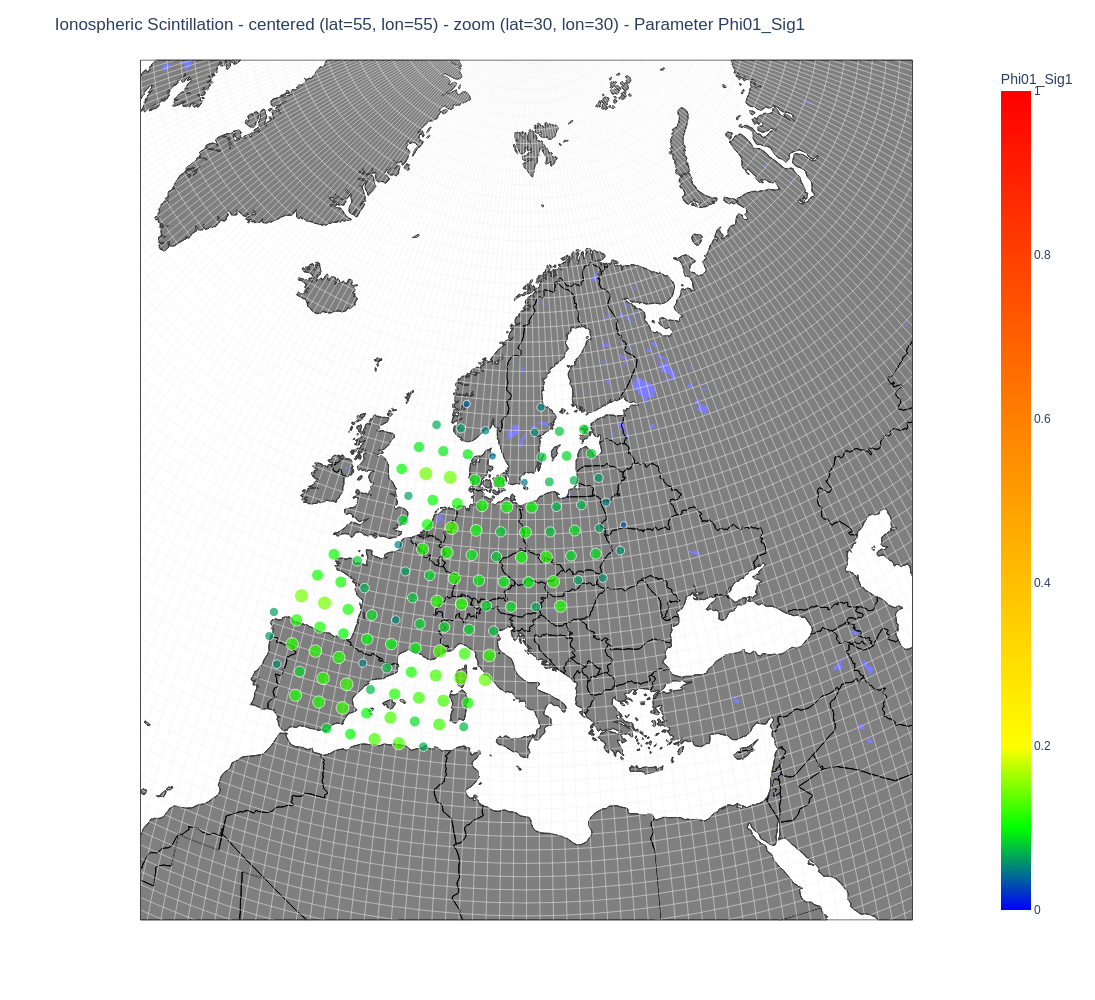

In [14]:
binlib.show_globe_map(data_map, "Phi01_Sig1", "count", "lat", "lon", center=(55, 15), zoom=(30, 30), save=False)

# New stuff

In [15]:
def recalc_dataframe_to_ml(dataframe):
    lat_bin, lon_bin = np.loadtxt("Bins_equidistant.txt", delimiter='\t', usecols=(0, 1), unpack=True)
    bins = []
    for (temp_lat, temp_lon) in zip(lat_bin, lon_bin):
        bins.append([temp_lat, temp_lon, 0])
        
    for j, line in enumerate(bins):
        for i in range(data.shape[0]): #data.shape[0]
            temp = np.any(dataframe["lat"][i]==line[0]) and np.any(dataframe["lon"][i]==line[1])
            if temp:
                try:
                    bins[j][2] = pd.concat([bins[j][2], data[i:i+1]])
                except:
                    bins[j][2] = data[i:i+1]
    return bins

In [16]:
def recalc_dataframe_to_ml_faster(dataframe, dataframe_map):
    lat_bin, lon_bin = np.loadtxt("Bins_equidistant.txt", delimiter='\t', usecols=(0, 1), unpack=True)
    bins = []
    for (temp_lat, temp_lon) in zip(lat_bin, lon_bin):
        bins.append([temp_lat, temp_lon, 0])
        
    bins_np = np.array(bins)
    offset = np.where(bins_np[::, 0] == dataframe_map["lat"][0])[0][0]
    onset = np.where(bins_np[::, 0] == dataframe_map["lat"][len(dataframe_map["lat"])-1])[0][-1]
    
    for j, line in enumerate(bins[offset:onset+1]):
        for i in range(data.shape[0]): #data.shape[0]
            temp = np.any(dataframe["lat"][i]==line[0]) and np.any(dataframe["lon"][i]==line[1])
            if temp:
                try:
                    bins[offset+j][2] = pd.concat([bins[offset+j][2], data[i:i+1]])
                except:
                    bins[offset+j][2] = data[i:i+1]
    return bins

In [17]:
data_ml_faster = binlib.recalc_dataframe_to_ml(data, data_map)

In [18]:
temp_faster = data_ml_faster[14366:14290+100]#[2]

In [19]:
import datetime
from matplotlib.dates import DateFormatter

In [20]:
def show_bin_series(dataframe_ml, lat_bins, lon_bins, value, time_start=None, time_end=None, marker="o", y_range_auto=True):
    
    fig, ax = plt.subplots(figsize=(20, 10))
    date_form = DateFormatter("%H:%M:%S")
    ax.xaxis.set_major_formatter(date_form)
    colours = np.array(['red', 'green', 'blue', 'black', 'gray', 'yellow', 'orange', 'magenta', 'skyblue', 'yellowgreen'])
    colour_index = 0
    for lat_bin, lon_bin in zip(lat_bins, lon_bins):
        if type(data_ml_faster[lat_bin][2]) == int: 
            continue
        plt.plot(data_ml_faster[lat_bin][2].index, data_ml_faster[lat_bin][2][value], marker, color=colours[colour_index%10])
        colour_index += 1
    plt.rcParams.update({'font.size': 20})
    plt.xlabel('time')
    plt.ylabel(value)
    plt.grid(True)
    plt.title('Phi01_Sig1 parameter measurements from one day from Neustrelitz and Toulouse, 01.09.2016')
    if y_range_auto==True:
        plt.ylim(0, data_ml_faster[lat_bin][0:-1][value].max())
    else:
        plt.ylim(y_range_auto[0], y_range_auto[1])
    
    plt.tight_layout()
    plt.show()

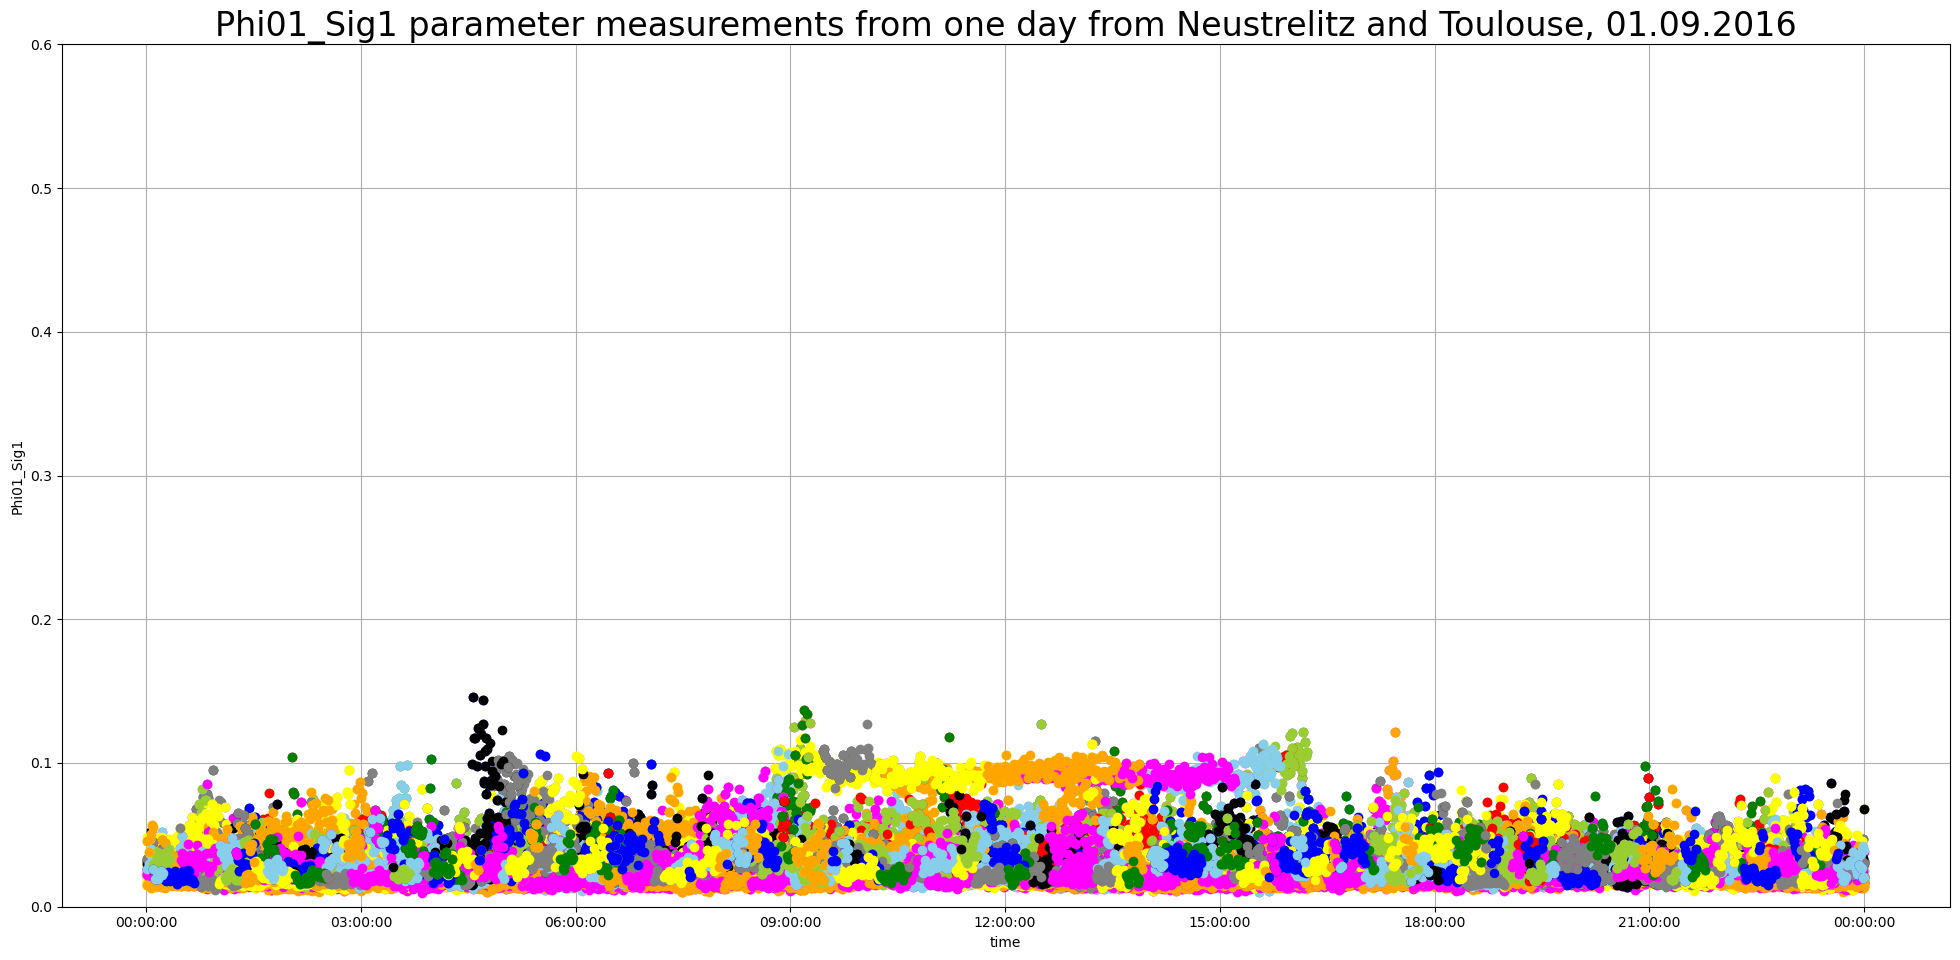

In [21]:
show_bin_series(data_ml_faster, np.arange(0, len(data_ml_faster)), np.arange(0, len(data_ml_faster)), "Phi01_Sig1", time_start=None, time_end=None, marker="o", y_range_auto=[0, 0.6])

In [22]:
colours = np.array(['red', 'green', 'blue', 'black', 'gray', 'yellow', 'orange', 'magenta', 'skyblue', 'yellowgreen'])
for i, (lat_bin, lon_bin) in enumerate(zip(np.arange(0, len(data_ml_faster)), np.arange(0, len(data_ml_faster)))):
        if type(data_ml_faster[lat_bin][2]) == int: 
            continue                  
        else:
            print(i) 

11781
11782
11783
11784
11785
11950
11951
11952
11953
11954
11955
11956
11957
12116
12117
12118
12119
12120
12121
12122
12123
12124
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12591
12592
12593
12594
12595
12596
12597
12598
12599
12741
12742
12743
12745
12746
12747
12748
12749
12750
12751
12886
12887
12889
12890
12891
12892
12893
12894
12895
12896
12897
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13293
13294
13295
13296
13297
13298
13299
13300
13301
13417
13418
13419
13420
13421
13422
13423
13424
13425
13537
13538
13539
13540
13542
13543
13544
13652
13653
13654
13656
13657
13658
13762
13765


In [23]:
data_ml_faster[11781][2].index[0]

Timestamp('2016-09-03 02:09:00')